In [1]:
import pandas as pd
import os
import numpy as np
import re


In [2]:
data= pd.read_csv('macro_nutrient_data.csv')
data

,name,energy,protein,fat,saturates,carbohydrate,sugars,fibre,salt
0,shepardless-pie,79kcal,1.8g,1.7g,0.2g,NaN,2.1g,2.0g,0.39g
1,Lidl_TowerGate_Cookie_Cranberrry,490kcal,5.1g,22.9g,10.9g,64.4g,45.2g,2.7g,0.67g
2,chocuer_milk_chocolate,2371kj/569kcal,7.7g,36.4g,NaN,51.6g,49.7g,NaN,0.18g
3,john-west-tuna-chunks-in-brine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lidl_PotatoWaffle_BirdsEye,94kcal,2.2g,NaN,0.5g,NaN,0.9g,1.3g,0.58g
...,...,...,...,...,...,...,...,...,...
575,WholeWheat_Fusilli_pasta_smokedHam,526kj/125kcal,9.3g,2.8g,1.4g,NaN,1.6g,NaN,0.549
576,battered-chicken-balls-aldi-roosters,769kj/183kcal,16.1g,6.8g,0.8g,13.9g,0.5g,1.0g,0.78g
577,fruit_juice2,188kj,0.5g,NaN,NaN,NaN,9.5g,0.3g,NaN
578,Lidl_Sliced_Irish_Mature_WhiteCheese,314kcal,27.9g,22.1g,13.8g,0.80,NaN,NaN,1.80g


In [3]:
data.isnull().sum()

name              0
energy           64
protein         130
fat             140
saturates       112
carbohydrate    164
sugars          132
fibre           164
salt            108
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          580 non-null    object
 1   energy        516 non-null    object
 2   protein       450 non-null    object
 3   fat           440 non-null    object
 4   saturates     468 non-null    object
 5   carbohydrate  416 non-null    object
 6   sugars        448 non-null    object
 7   fibre         416 non-null    object
 8   salt          472 non-null    object
dtypes: object(9)
memory usage: 40.9+ KB


In [5]:
#def clean_val(val):
 #   return float(val.replace('g', '').replace('<', '')) if isinstance(val,str) and 'g' in val else val

def clean_val(val):
    if isinstance(val, str):
        cleaned_val = val.replace('g', '').replace('<', '')
        try:
            return float(cleaned_val)
        except ValueError:
            return val
    else:
        return val

# Apply the function to the DataFrame
data = data.applymap(clean_val)

print(data)

                                     name          energy  protein   fat  \
0                         shepardless-pie          79kcal      1.8   1.7   
1        Lidl_TowerGate_Cookie_Cranberrry         490kcal      5.1  22.9   
2                  chocuer_milk_chocolate  2371kj/569kcal      7.7  36.4   
3          john-west-tuna-chunks-in-brine             NaN      NaN   NaN   
4              Lidl_PotatoWaffle_BirdsEye          94kcal      2.2   NaN   
..                                    ...             ...      ...   ...   
575    WholeWheat_Fusilli_pasta_smokedHam   526kj/125kcal      9.3   2.8   
576  battered-chicken-balls-aldi-roosters   769kj/183kcal     16.1   6.8   
577                          fruit_juice2           188kj      0.5   NaN   
578  Lidl_Sliced_Irish_Mature_WhiteCheese         314kcal     27.9  22.1   
579                                 pork3  1388kj 335kcal     18.0  29.0   

     saturates  carbohydrate  sugars  fibre   salt  
0          0.2           NaN     2

/var/folders/36/11dhy8pn2gb_w904ysmkk2h80000gn/T/ipykernel_63292/1836811762.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(clean_val)


In [6]:
df = pd.DataFrame(data)

# Function to convert kJ to kcal
def kj_to_kcal(kj):
    return float(kj) * 0.239

# Function to extract and convert energy values, then return the maximum in kcal
def extract_max_kcal(energy):
    if pd.isna(energy):
        return None
    
    energy = energy.lower()
    kcal_values = []
    
    # Extract kcal values
    kcal_matches = re.findall(r'(\d+)\s*kcal', energy)
    kcal_values.extend([float(kcal) for kcal in kcal_matches])
    
    # Extract kJ values and convert them to kcal
    kj_matches = re.findall(r'(\d+)\s*kj', energy)
    kcal_values.extend([kj_to_kcal(kj) for kj in kj_matches])
    
    # Return the maximum kcal value
    if kcal_values:
        return max(kcal_values)
    return None

# Apply the function to the energy column
df['max_energy_kcal'] = df['energy'].apply(extract_max_kcal)

# Drop the original energy column if not needed
df.drop(columns=['energy'], inplace=True)

df.head(10)


,name,protein,fat,saturates,carbohydrate,sugars,fibre,salt,max_energy_kcal
0,shepardless-pie,1.8,1.7,0.2,NaN,2.1,2.0,0.39,79.000
1,Lidl_TowerGate_Cookie_Cranberrry,5.1,22.9,10.9,64.4,45.2,2.7,0.67,490.000
2,chocuer_milk_chocolate,7.7,36.4,NaN,51.6,49.7,NaN,0.18,569.000
3,john-west-tuna-chunks-in-brine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lidl_PotatoWaffle_BirdsEye,2.2,NaN,0.5,NaN,0.9,1.3,0.58,94.000
5,irish_chicken5,23.0,14.8,2.3,1.4,0.3,0.5,2.01,230.874
6,Tesco_Healthy_Cookie_2,9.5,24.5,6.6,58.5,2.9,3.3,0.80,499.000
7,spicy-mexican-style-chicken-thigh-kebabs-lidl,19.2,6.7,2.0,1.5,0.9,1.0,0.45,145.312
8,Veg_Crumbs,12.0,7.4,1.6,26.0,0.7,4.7,1.08,229.000
9,Lidl_chicken_nuggets_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             580 non-null    object 
 1   protein          450 non-null    float64
 2   fat              440 non-null    float64
 3   saturates        468 non-null    float64
 4   carbohydrate     416 non-null    float64
 5   sugars           448 non-null    float64
 6   fibre            416 non-null    float64
 7   salt             472 non-null    float64
 8   max_energy_kcal  516 non-null    float64
dtypes: float64(8), object(1)
memory usage: 40.9+ KB


In [8]:
df.isna().sum()

name                 0
protein            130
fat                140
saturates          112
carbohydrate       164
sugars             132
fibre              164
salt               108
max_energy_kcal     64
dtype: int64

In [9]:
df.rename(columns={'max_energy_kcal':'Total Energy_Kcal', 'protein':'protein_g', 'carbohydrate':'carbohydrates_g','fat':'fats_g','saturates':'saturated_fats_g','sugars':'sugars_g','fibre':'fibres_g','salt':'salt_g'},inplace=True)
df

,name,protein_g,fats_g,saturated_fats_g,carbohydrates_g,sugars_g,fibres_g,salt_g,Total Energy_Kcal
0,shepardless-pie,1.8,1.7,0.2,NaN,2.1,2.0,0.390,79.000
1,Lidl_TowerGate_Cookie_Cranberrry,5.1,22.9,10.9,64.4,45.2,2.7,0.670,490.000
2,chocuer_milk_chocolate,7.7,36.4,NaN,51.6,49.7,NaN,0.180,569.000
3,john-west-tuna-chunks-in-brine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lidl_PotatoWaffle_BirdsEye,2.2,NaN,0.5,NaN,0.9,1.3,0.580,94.000
...,...,...,...,...,...,...,...,...,...
575,WholeWheat_Fusilli_pasta_smokedHam,9.3,2.8,1.4,NaN,1.6,NaN,0.549,125.714
576,battered-chicken-balls-aldi-roosters,16.1,6.8,0.8,13.9,0.5,1.0,0.780,183.791
577,fruit_juice2,0.5,NaN,NaN,NaN,9.5,0.3,NaN,44.932
578,Lidl_Sliced_Irish_Mature_WhiteCheese,27.9,22.1,13.8,0.8,NaN,NaN,1.800,314.000


In [10]:
categorical_name=df.pop('name')


In [11]:
df.corr()

,protein_g,fats_g,saturated_fats_g,carbohydrates_g,sugars_g,fibres_g,salt_g,Total Energy_Kcal
protein_g,1.000000,0.217827,0.192404,-0.312612,-0.243713,-0.188374,0.304698,0.078200
fats_g,0.217827,1.000000,0.587178,-0.014192,0.135638,-0.062566,0.102597,0.408998
saturated_fats_g,0.192404,0.587178,1.000000,-0.027990,0.243440,-0.102915,0.154255,0.273237
carbohydrates_g,-0.312612,-0.014192,-0.027990,1.000000,0.570317,0.300800,-0.052409,0.316922
sugars_g,-0.243713,0.135638,0.243440,0.570317,1.000000,0.095500,-0.085239,0.168081
fibres_g,-0.188374,-0.062566,-0.102915,0.300800,0.095500,1.000000,0.104463,0.104089
salt_g,0.304698,0.102597,0.154255,-0.052409,-0.085239,0.104463,1.000000,-0.003007
Total Energy_Kcal,0.078200,0.408998,0.273237,0.316922,0.168081,0.104089,-0.003007,1.000000


<Axes: >

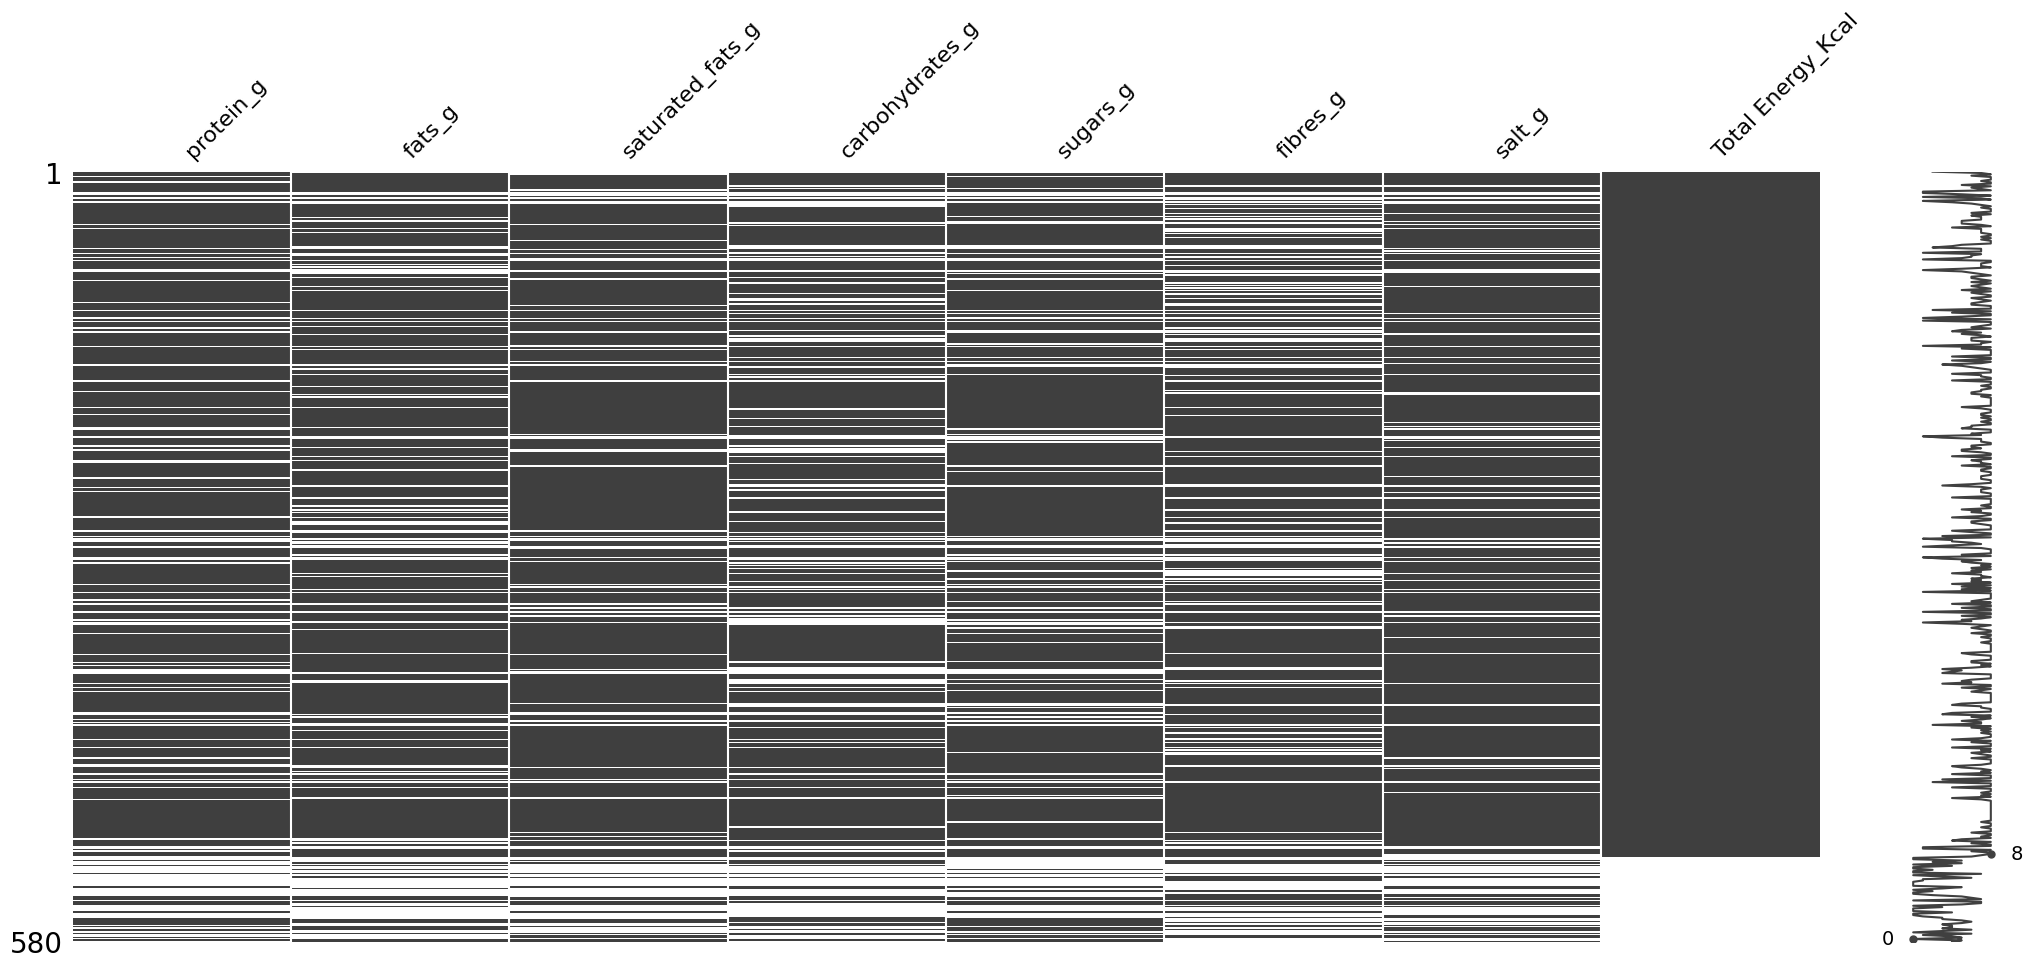

In [12]:
import missingno as msno
sorted = df.sort_values('Total Energy_Kcal')
msno.matrix(sorted)

<Axes: >

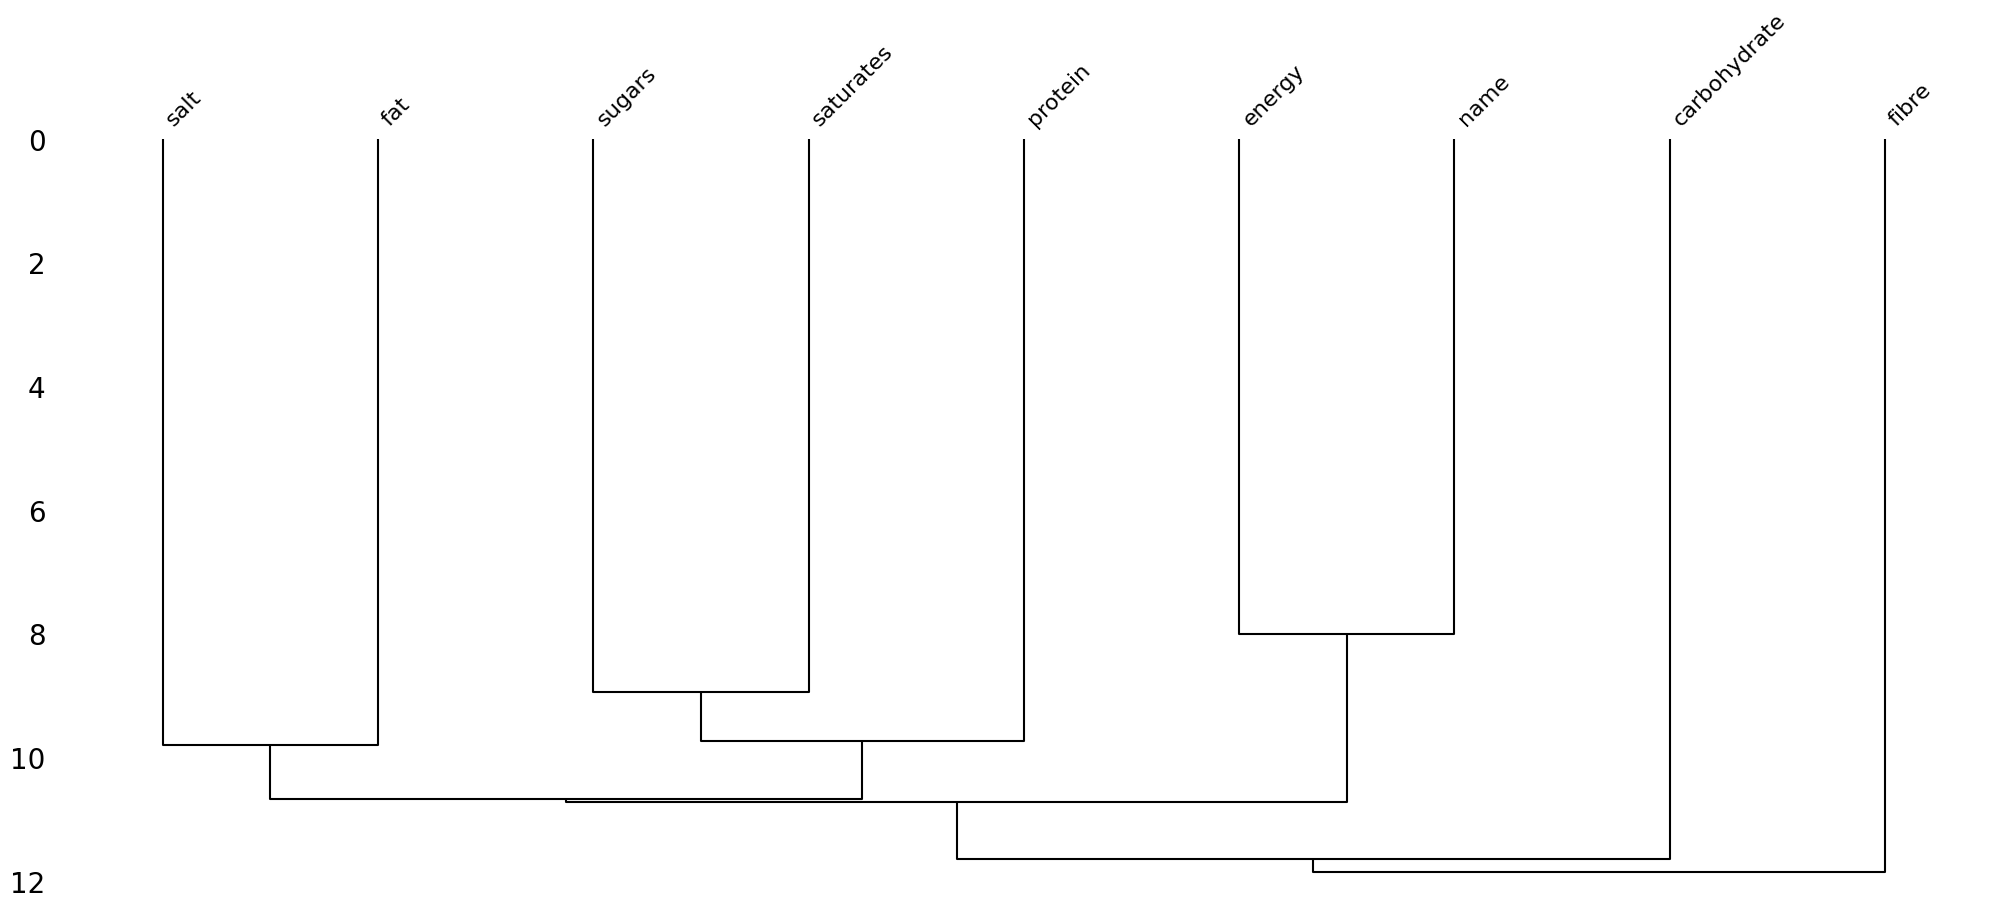

In [66]:
msno.dendrogram(data)

In [13]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Filling Missing Value 

In [14]:
from sklearn.ensemble import RandomForestRegressor # Random Forest regression model
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier model
from sklearn.impute import SimpleImputer # For imputing missing values with a simple strategy

from xgboost import XGBClassifier # XGBoost classification model

In [15]:
df

,protein_g,fats_g,saturated_fats_g,carbohydrates_g,sugars_g,fibres_g,salt_g,Total Energy_Kcal
0,1.8,1.7,0.2,NaN,2.1,2.0,0.390,79.000
1,5.1,22.9,10.9,64.4,45.2,2.7,0.670,490.000
2,7.7,36.4,NaN,51.6,49.7,NaN,0.180,569.000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.2,NaN,0.5,NaN,0.9,1.3,0.580,94.000
...,...,...,...,...,...,...,...,...
575,9.3,2.8,1.4,NaN,1.6,NaN,0.549,125.714
576,16.1,6.8,0.8,13.9,0.5,1.0,0.780,183.791
577,0.5,NaN,NaN,NaN,9.5,0.3,NaN,44.932
578,27.9,22.1,13.8,0.8,NaN,NaN,1.800,314.000


In [16]:
df.isna().sum()

protein_g            130
fats_g               140
saturated_fats_g     112
carbohydrates_g      164
sugars_g             132
fibres_g             164
salt_g               108
Total Energy_Kcal     64
dtype: int64

In [17]:
rf_df= pd.DataFrame(df)

# Define function for random forest imputation
def random_forest_impute(rf_df, target_column, feature_columns):
    """
    Imputes missing values in the target column using Random Forest based on the feature columns.
    """
    # Separate missing and non-missing data
    df_missing = rf_df[rf_df[target_column].isnull()]
    df_not_missing = rf_df.dropna(subset=[target_column])

    # If there is no data to fit the model, return the original dataframe
    if df_not_missing.empty or df_missing.empty:
        return rf_df

    # Features and target for training the model
    X_train = df_not_missing[feature_columns]
    y_train = df_not_missing[target_column]

    # Create and fit the Random Forest regression model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict missing values
    X_missing = df_missing[feature_columns]
    predicted_values = model.predict(X_missing)

    # Fill the missing values in the original dataframe
    df_filled = rf_df.copy()
    df_filled.loc[df_filled[target_column].isnull(), target_column] = predicted_values

    return df_filled

# List of columns to impute
target_columns_to_impute = ['protein_g', 'fats_g', 'saturated_fats_g', 'carbohydrates_g', 'sugars_g', 'fibres_g', 'salt_g', 'Total Energy_Kcal']
# The columns to be used as features (you can modify this list as needed)
feature_columns_for_imputation = ['protein_g', 'fats_g', 'saturated_fats_g', 'carbohydrates_g', 'sugars_g', 'fibres_g', 'salt_g']

# Impute missing values for each target column
for target_column in target_columns_to_impute:
    # Ensure the feature columns don't include the target column itself
    feature_columns = [col for col in feature_columns_for_imputation if col != target_column]
    rf_df = random_forest_impute(rf_df, target_column, feature_columns)

# Display the DataFrame after imputation
print("\nDataFrame after Random Forest Imputation:")
print(rf_df)

# Check if there are still any missing values in the DataFrame
print("\nSum of NULL Values after Imputation:")
print(rf_df.isnull().sum())


DataFrame after Random Forest Imputation:
     protein_g     fats_g  saturated_fats_g  carbohydrates_g  sugars_g  \
0     1.800000   1.700000            0.2000           9.3648    2.1000   
1     5.100000  22.900000           10.9000          64.4000   45.2000   
2     7.700000  36.400000           15.6420          51.6000   49.7000   
3     2.689187   1.568333            0.4188           7.4144    3.2178   
4     2.200000   3.504000            0.5000          15.3350    0.9000   
..         ...        ...               ...              ...       ...   
575   9.300000   2.800000            1.4000          14.0222    1.6000   
576  16.100000   6.800000            0.8000          13.9000    0.5000   
577   0.500000   2.571000            2.5350           6.2368    9.5000   
578  27.900000  22.100000           13.8000           0.8000    0.2070   
579  18.000000  29.000000            9.5000           0.5000    0.5000   

     fibres_g   salt_g  Total Energy_Kcal  
0      2.0000  0.39000  

In [18]:
# Add the 'name' column back to the DataFrame
rf_df['name'] = categorical_name

# Optional: Move the 'name' column to the front if needed
rf_df = rf_df[['name'] + [col for col in rf_df.columns if col != 'name']]

# Calculating Nutri-Score based on OpenFoodFacts Nutri-Score guide

In [20]:
def calculate_negative_points(row):
    # Energy Points (in kJ) - Energy in kcal is multiplied by 4.184 to convert to kJ
    energy_points = 0
    energy_kj = row['Total Energy_Kcal'] * 4.184
    if energy_kj > 3350: energy_points = 10
    elif energy_kj > 3010: energy_points = 9
    elif energy_kj > 2680: energy_points = 8
    elif energy_kj > 2350: energy_points = 7
    elif energy_kj > 2010: energy_points = 6
    elif energy_kj > 1670: energy_points = 5
    elif energy_kj > 1340: energy_points = 4
    elif energy_kj > 1000: energy_points = 3
    elif energy_kj > 670: energy_points = 2
    elif energy_kj > 335: energy_points = 1
    
    # Sugars Points
    sugars_points = 0
    if row['sugars_g'] > 45: sugars_points = 10
    elif row['sugars_g'] > 40: sugars_points = 9
    elif row['sugars_g'] > 36: sugars_points = 8
    elif row['sugars_g'] > 31: sugars_points = 7
    elif row['sugars_g'] > 27: sugars_points = 6
    elif row['sugars_g'] > 22.5: sugars_points = 5
    elif row['sugars_g'] > 18: sugars_points = 4
    elif row['sugars_g'] > 13.5: sugars_points = 3
    elif row['sugars_g'] > 9: sugars_points = 2
    elif row['sugars_g'] > 4.5: sugars_points = 1
    
    # Saturated Fats Points
    sat_fats_points = 0
    if row['saturated_fats_g'] > 10: sat_fats_points = 10
    elif row['saturated_fats_g'] > 9: sat_fats_points = 9
    elif row['saturated_fats_g'] > 8: sat_fats_points = 8
    elif row['saturated_fats_g'] > 7: sat_fats_points = 7
    elif row['saturated_fats_g'] > 6: sat_fats_points = 6
    elif row['saturated_fats_g'] > 5: sat_fats_points = 5
    elif row['saturated_fats_g'] > 4: sat_fats_points = 4
    elif row['saturated_fats_g'] > 3: sat_fats_points = 3
    elif row['saturated_fats_g'] > 2: sat_fats_points = 2
    elif row['saturated_fats_g'] > 1: sat_fats_points = 1
    
    # Sodium Points (calculated from salt)
    sodium_points = 0
    sodium_mg = row['salt_g'] * 400  # Convert salt (g) to sodium (mg)
    if sodium_mg > 900: sodium_points = 10
    elif sodium_mg > 810: sodium_points = 9
    elif sodium_mg > 720: sodium_points = 8
    elif sodium_mg > 630: sodium_points = 7
    elif sodium_mg > 540: sodium_points = 6
    elif sodium_mg > 450: sodium_points = 5
    elif sodium_mg > 360: sodium_points = 4
    elif sodium_mg > 270: sodium_points = 3
    elif sodium_mg > 180: sodium_points = 2
    elif sodium_mg > 90: sodium_points = 1
    
    return energy_points + sugars_points + sat_fats_points + sodium_points

def calculate_positive_points(row):
    # Fiber Points
    fiber_points = 0
    if row['fibres_g'] > 4.7: fiber_points = 5
    elif row['fibres_g'] > 3.7: fiber_points = 4
    elif row['fibres_g'] > 2.8: fiber_points = 3
    elif row['fibres_g'] > 1.9: fiber_points = 2
    elif row['fibres_g'] > 0.9: fiber_points = 1
    
    # Protein Points
    protein_points = 0
    if row['protein_g'] > 8: protein_points = 5
    elif row['protein_g'] > 6.4: protein_points = 4
    elif row['protein_g'] > 4.8: protein_points = 3
    elif row['protein_g'] > 3.2: protein_points = 2
    elif row['protein_g'] > 1.6: protein_points = 1
    
    return fiber_points + protein_points

def calculate_nutri_score(row):
    negative_points = calculate_negative_points(row)
    positive_points = calculate_positive_points(row)
    nutri_score = negative_points - positive_points
    
    # Assigning Nutri-Score letter
    if nutri_score <= -1:
        return 'A'
    elif nutri_score <= 2:
        return 'B'
    elif nutri_score <= 10:
        return 'C'
    elif nutri_score <= 18:
        return 'D'
    else:
        return 'E'

# Assuming df is your DataFrame with the nutrient columns
rf_df['Nutri_Score'] = rf_df.apply(calculate_nutri_score, axis=1)

# Display the DataFrame with Nutri-Score
print(rf_df[['protein_g', 'fats_g', 'saturated_fats_g', 'carbohydrates_g', 'sugars_g', 'fibres_g', 'salt_g', 'Total Energy_Kcal', 'Nutri_Score']])


     protein_g     fats_g  saturated_fats_g  carbohydrates_g  sugars_g  \
0     1.800000   1.700000            0.2000           9.3648    2.1000   
1     5.100000  22.900000           10.9000          64.4000   45.2000   
2     7.700000  36.400000           15.6420          51.6000   49.7000   
3     2.689187   1.568333            0.4188           7.4144    3.2178   
4     2.200000   3.504000            0.5000          15.3350    0.9000   
..         ...        ...               ...              ...       ...   
575   9.300000   2.800000            1.4000          14.0222    1.6000   
576  16.100000   6.800000            0.8000          13.9000    0.5000   
577   0.500000   2.571000            2.5350           6.2368    9.5000   
578  27.900000  22.100000           13.8000           0.8000    0.2070   
579  18.000000  29.000000            9.5000           0.5000    0.5000   

     fibres_g   salt_g  Total Energy_Kcal Nutri_Score  
0      2.0000  0.39000           79.00000           A  

In [21]:
rf_df

,name,protein_g,fats_g,saturated_fats_g,carbohydrates_g,sugars_g,fibres_g,salt_g,Total Energy_Kcal,Nutri_Score
0,shepardless-pie,1.800000,1.700000,0.2000,9.3648,2.1000,2.0000,0.39000,79.00000,A
1,Lidl_TowerGate_Cookie_Cranberrry,5.100000,22.900000,10.9000,64.4000,45.2000,2.7000,0.67000,490.00000,E
2,chocuer_milk_chocolate,7.700000,36.400000,15.6420,51.6000,49.7000,2.7670,0.18000,569.00000,E
3,john-west-tuna-chunks-in-brine,2.689187,1.568333,0.4188,7.4144,3.2178,2.9255,0.42756,240.54218,B
4,Lidl_PotatoWaffle_BirdsEye,2.200000,3.504000,0.5000,15.3350,0.9000,1.3000,0.58000,94.00000,B
...,...,...,...,...,...,...,...,...,...,...
575,WholeWheat_Fusilli_pasta_smokedHam,9.300000,2.800000,1.4000,14.0222,1.6000,1.3880,0.54900,125.71400,A
576,battered-chicken-balls-aldi-roosters,16.100000,6.800000,0.8000,13.9000,0.5000,1.0000,0.78000,183.79100,A
577,fruit_juice2,0.500000,2.571000,2.5350,6.2368,9.5000,0.3000,0.48790,44.93200,C
578,Lidl_Sliced_Irish_Mature_WhiteCheese,27.900000,22.100000,13.8000,0.8000,0.2070,0.1950,1.80000,314.00000,D


In [164]:
rf_df.to_csv('Nutrient_data.csv', index=False)

# Predict Healthy/Non-Healthy


In [22]:
data= pd.read_csv('nutrient_data.csv')
data

,name,protein_g,fats_g,saturated_fats_g,carbohydrates_g,sugars_g,fibres_g,salt_g,Total Energy_Kcal,Nutri_Score
0,shepardless-pie,1.800000,1.700000,0.2000,9.3648,2.1000,2.0000,0.39000,79.00000,A
1,Lidl_TowerGate_Cookie_Cranberrry,5.100000,22.900000,10.9000,64.4000,45.2000,2.7000,0.67000,490.00000,E
2,chocuer_milk_chocolate,7.700000,36.400000,15.6420,51.6000,49.7000,2.7670,0.18000,569.00000,E
3,john-west-tuna-chunks-in-brine,2.689187,1.568333,0.4188,7.4144,3.2178,2.9255,0.42756,240.54218,B
4,Lidl_PotatoWaffle_BirdsEye,2.200000,3.504000,0.5000,15.3350,0.9000,1.3000,0.58000,94.00000,B
...,...,...,...,...,...,...,...,...,...,...
575,WholeWheat_Fusilli_pasta_smokedHam,9.300000,2.800000,1.4000,14.0222,1.6000,1.3880,0.54900,125.71400,A
576,battered-chicken-balls-aldi-roosters,16.100000,6.800000,0.8000,13.9000,0.5000,1.0000,0.78000,183.79100,A
577,fruit_juice2,0.500000,2.571000,2.5350,6.2368,9.5000,0.3000,0.48790,44.93200,C
578,Lidl_Sliced_Irish_Mature_WhiteCheese,27.900000,22.100000,13.8000,0.8000,0.2070,0.1950,1.80000,314.00000,D


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               580 non-null    object 
 1   protein_g          580 non-null    float64
 2   fats_g             580 non-null    float64
 3   saturated_fats_g   580 non-null    float64
 4   carbohydrates_g    580 non-null    float64
 5   sugars_g           580 non-null    float64
 6   fibres_g           580 non-null    float64
 7   salt_g             580 non-null    float64
 8   Total Energy_Kcal  580 non-null    float64
 9   Nutri_Score        580 non-null    object 
dtypes: float64(8), object(2)
memory usage: 45.4+ KB


In [24]:
data['Nutri_Score'].value_counts()

Nutri_Score
A    186
B    161
C    140
D     69
E     24
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [26]:
# Define the target variable 'is_healthy' (1 for 'A' or 'B', 0 otherwise)
data['Healthy'] = data['Nutri_Score'].apply(lambda x: 1 if x in ['A', 'B'] else 0)


In [27]:
# Features: only the nutrient columns, excluding Nutri_Score
features = ['protein_g', 'fats_g', 'saturated_fats_g', 'carbohydrates_g', 'sugars_g', 'fibres_g', 'salt_g', 'Total Energy_Kcal']
X = data[features]
y = data['Healthy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X

,protein_g,fats_g,saturated_fats_g,carbohydrates_g,sugars_g,fibres_g,salt_g,Total Energy_Kcal
0,1.800000,1.700000,0.2000,9.3648,2.1000,2.0000,0.39000,79.00000
1,5.100000,22.900000,10.9000,64.4000,45.2000,2.7000,0.67000,490.00000
2,7.700000,36.400000,15.6420,51.6000,49.7000,2.7670,0.18000,569.00000
3,2.689187,1.568333,0.4188,7.4144,3.2178,2.9255,0.42756,240.54218
4,2.200000,3.504000,0.5000,15.3350,0.9000,1.3000,0.58000,94.00000
...,...,...,...,...,...,...,...,...
575,9.300000,2.800000,1.4000,14.0222,1.6000,1.3880,0.54900,125.71400
576,16.100000,6.800000,0.8000,13.9000,0.5000,1.0000,0.78000,183.79100
577,0.500000,2.571000,2.5350,6.2368,9.5000,0.3000,0.48790,44.93200
578,27.900000,22.100000,13.8000,0.8000,0.2070,0.1950,1.80000,314.00000


In [28]:
# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


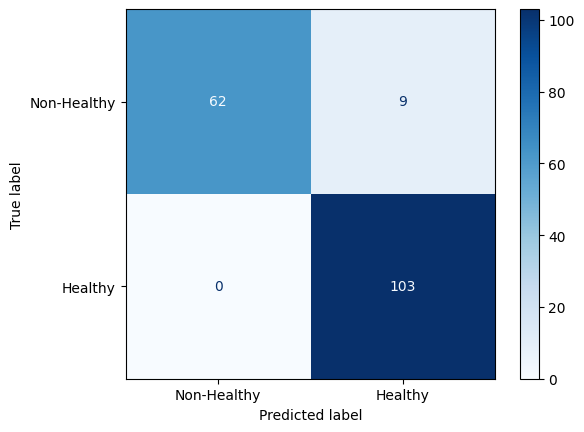

              precision    recall  f1-score   support

 Non-Healthy       1.00      0.87      0.93        71
     Healthy       0.92      1.00      0.96       103

    accuracy                           0.95       174
   macro avg       0.96      0.94      0.95       174
weighted avg       0.95      0.95      0.95       174



In [29]:
# Logistic regression
model_lr= LogisticRegression(random_state=42)

# train model
model_lr.fit(X_train,y_train)

# predict on test set
y_pred= model_lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm= confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Healthy', 'Healthy'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Non-Healthy', 'Healthy'])
print(report)


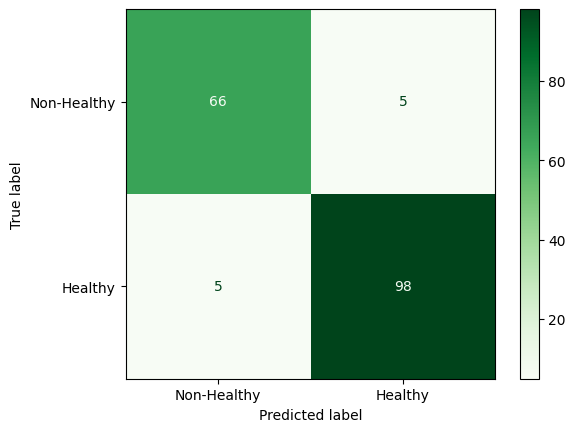

              precision    recall  f1-score   support

 Non-Healthy       0.93      0.93      0.93        71
     Healthy       0.95      0.95      0.95       103

    accuracy                           0.94       174
   macro avg       0.94      0.94      0.94       174
weighted avg       0.94      0.94      0.94       174



In [30]:
# Decision trees
model_dt= DecisionTreeClassifier(random_state=42)

# train model
model_dt.fit(X_train,y_train)

# predict on test set
y_pred= model_dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm= confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Healthy', 'Healthy'])
disp.plot(cmap=plt.cm.Greens)
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Non-Healthy', 'Healthy'])
print(report)


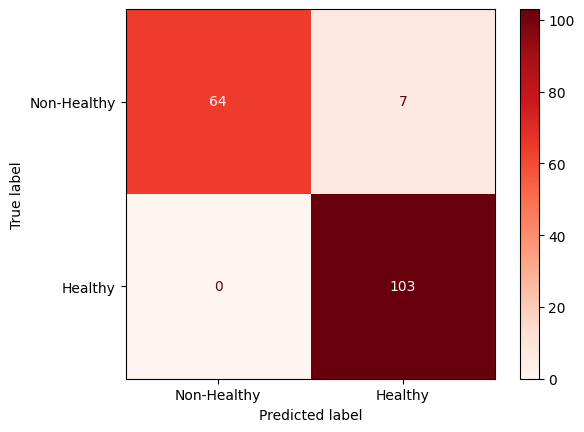

              precision    recall  f1-score   support

 Non-Healthy       1.00      0.90      0.95        71
     Healthy       0.94      1.00      0.97       103

    accuracy                           0.96       174
   macro avg       0.97      0.95      0.96       174
weighted avg       0.96      0.96      0.96       174



In [31]:
# Random forest
model_rf= RandomForestClassifier(random_state=42)

# train model
model_rf.fit(X_train,y_train)

# predict on test set
y_pred= model_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm= confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Healthy', 'Healthy'])
disp.plot(cmap=plt.cm.Reds)
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Non-Healthy', 'Healthy'])
print(report)


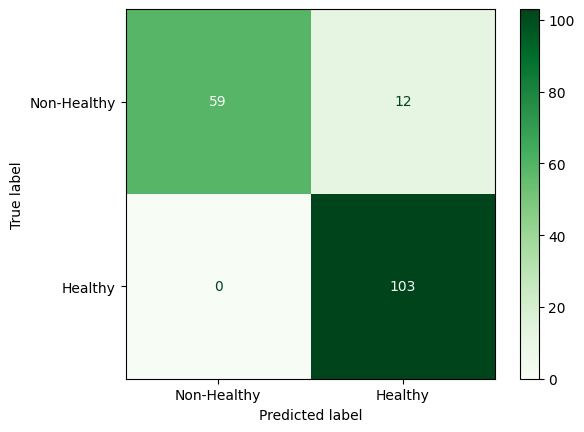

              precision    recall  f1-score   support

 Non-Healthy       1.00      0.83      0.91        71
     Healthy       0.90      1.00      0.94       103

    accuracy                           0.93       174
   macro avg       0.95      0.92      0.93       174
weighted avg       0.94      0.93      0.93       174



In [32]:
model_svc= SVC(random_state=42)

# train model
model_svc.fit(X_train,y_train)

# predict on test set
y_pred= model_svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm= confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Healthy', 'Healthy'])
disp.plot(cmap=plt.cm.Greens)
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Non-Healthy', 'Healthy'])
print(report)


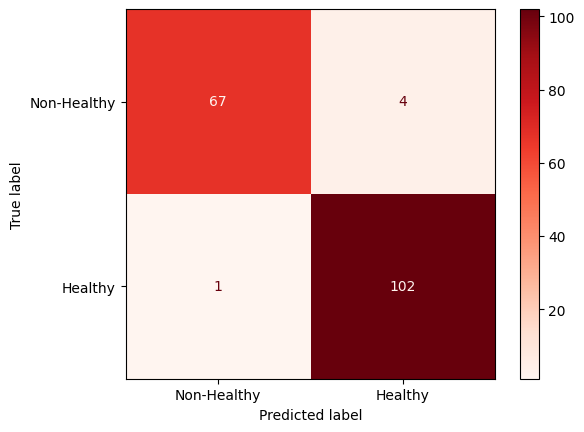

              precision    recall  f1-score   support

 Non-Healthy       0.99      0.94      0.96        71
     Healthy       0.96      0.99      0.98       103

    accuracy                           0.97       174
   macro avg       0.97      0.97      0.97       174
weighted avg       0.97      0.97      0.97       174



In [33]:
# Gradient Boosting
model_gb= GradientBoostingClassifier(random_state=42)

# train model
model_gb.fit(X_train,y_train)

# predict on test set
y_pred= model_gb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm= confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Healthy', 'Healthy'])
disp.plot(cmap=plt.cm.Reds)
plt.show()

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Non-Healthy', 'Healthy'])
print(report)


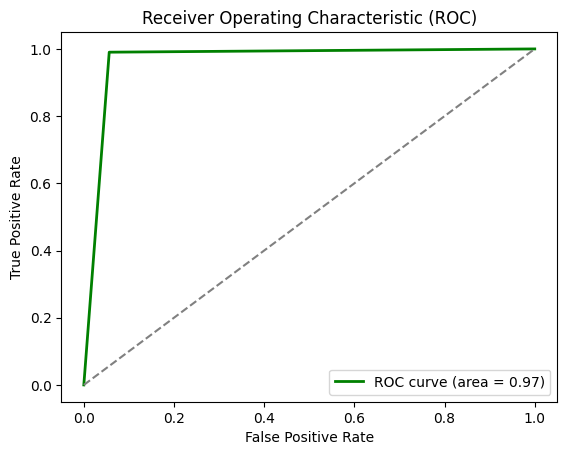

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

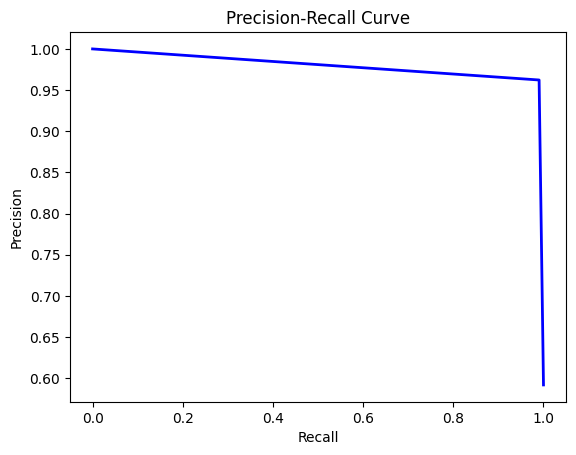

In [35]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


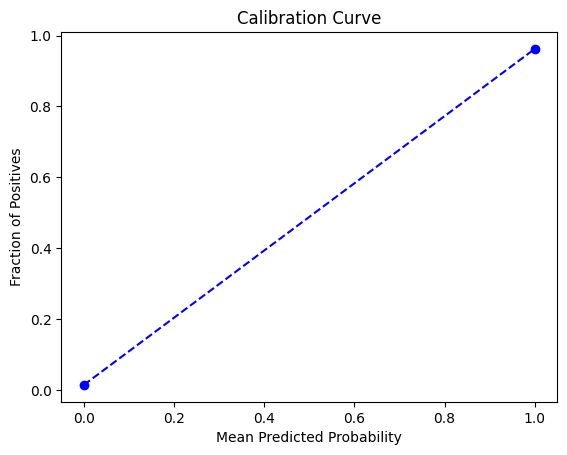

In [41]:
from sklearn.calibration import calibration_curve

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

# Plot calibration curve
plt.figure()
plt.plot(prob_pred, prob_true, marker='o', linestyle='--', color='blue')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.show()


In [38]:
data['Healthy'].value_counts()

Healthy
1    347
0    233
Name: count, dtype: int64

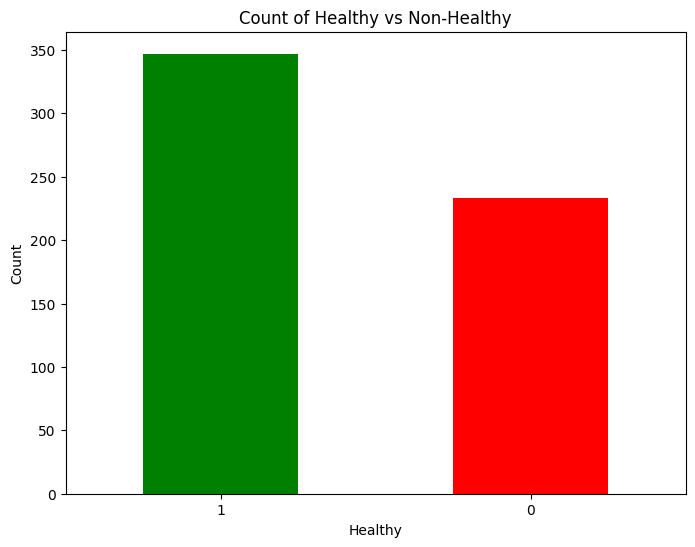

In [39]:
# Count the occurrences of each unique value in the 'Healthy' column
counts = data['Healthy'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['green', 'red'])  # You can customize colors
plt.title('Count of Healthy vs Non-Healthy')
plt.xlabel('Healthy')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels for better readability if needed
plt.show()